# Ejercicio de Distribución de Productos



---
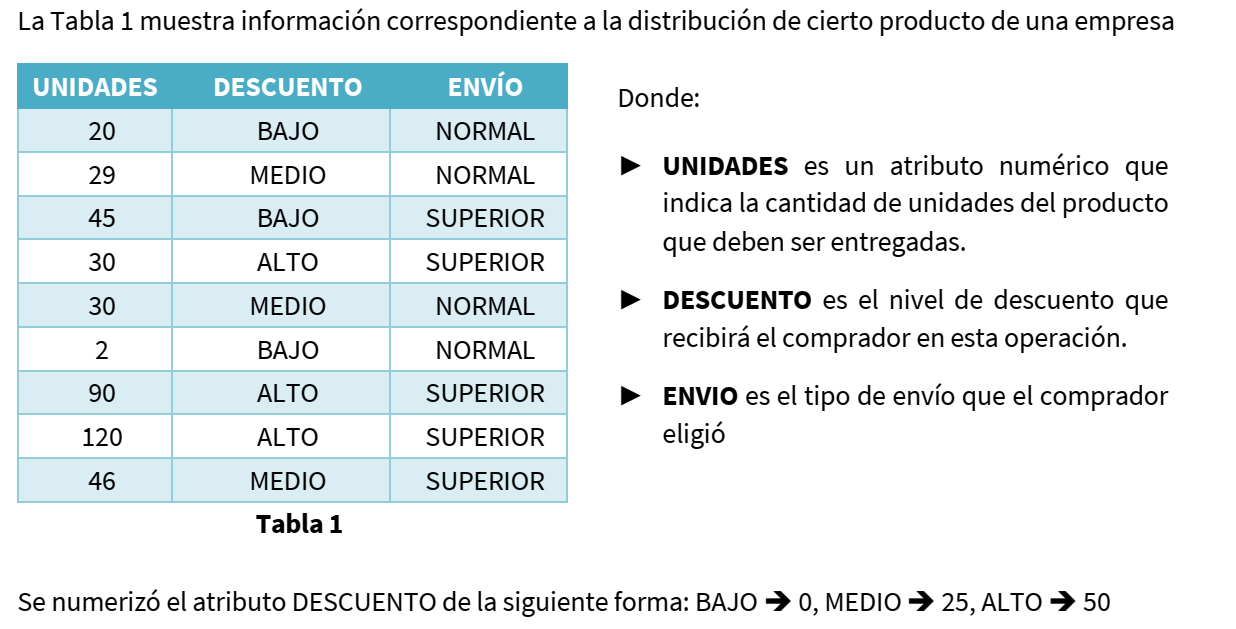

### Numerización de Atributos Categóricos

In [3]:
"""
Ejemplo de creacion de un Dataframe desde el código con reemplazo de valores
ordinales por numéricos
"""
import pandas as pd


# Datos creados de forma manual
datos = [
    [20, 'BAJO', 'NORMAL'],
    [29, 'MEDIO','NORMAL'],
    [45, 'BAJO', 'SUPERIOR'],
    [30, 'ALTO', 'SUPERIOR'],
    [30, 'MEDIO','NORMAL'],
    [2, 'BAJO','NORMAL'],
    [90, 'ALTO','SUPERIOR'],
    [120, 'ALTO','SUPERIOR'],
    [46,'MEDIO','SUPERIOR']
    ]


#crea un Dataframe con "datos" con los nombres de columnas
df = pd.DataFrame(datos, columns=['UNIDADES', 'DESCUENTO', 'ENVIO'])


# en Python los diccionarios se construyen así : { clave1: valor1, clave2: valor2, etc.}

# para cada columna a reemplazar se indica un diccionario con valor a remplazar y valor de reemplazo
valores_reemplazables = {
    'DESCUENTO': {'BAJO': 0, 'MEDIO': 25, 'ALTO': 50},
    'ENVIO': {'NORMAL': 0, 'SUPERIOR': 1}
    }

df['DESCUENTO'] = df['DESCUENTO'].map(valores_reemplazables['DESCUENTO'])
df['ENVIO'] = df['ENVIO'].map(valores_reemplazables['ENVIO'])

df

,UNIDADES,DESCUENTO,ENVIO
0,20,0,0
1,29,25,0
2,45,0,1
3,30,50,1
4,30,25,0
5,2,0,0
6,90,50,1
7,120,50,1
8,46,25,1


### Correlacion de Atributos Unidades vs. Descuento

In [2]:
# Calcula matriz de correlacion unidades y descuentos
print(df[['UNIDADES', 'DESCUENTO']].corr())

           UNIDADES  DESCUENTO
UNIDADES   1.000000   0.678806
DESCUENTO  0.678806   1.000000


---
### Prueba de un Perceptrón Entrenado
Luego de numerizar el atributo DESCUENTO, los ejemplos fueron normalizados linealmente en el intervalo [0; 1] y utilizados para entrenar un perceptrón capaz de predecir correctamente el atributo
ENVIO. Los pesos obtenidos fueron los siguientes:

          w(UNIDADES) = 0.484; w(DESCUENTO) = 0.06; b = -0.161
¿Cuál será la respuesta del perceptrón para un pedido de 41 UNIDADES con un DESCUENTO = BAJO?

In [3]:
unidad = 41
valor_desc = 'BAJO'
descuento = valores_reemplazables['DESCUENTO'][valor_desc]

# requiere normalizar con MinMax
unidad = (unidad - df['UNIDADES'].min()) / (df['UNIDADES'].max()-df['UNIDADES'].min())

descuento = (descuento - df['DESCUENTO'].min()) / (df['DESCUENTO'].max()-df['DESCUENTO'].min())

#0.043 * df['UNIDADES'] + 0.006 * df['DESCUENTO'] + 0.015

w = {'UNIDADES': 0.484, 'DESCUENTO': 0.06 }  # pesos
b = -0.161                                   # bias/sesgo

# calculo de unidad
respuesta = w['UNIDADES'] * unidad + w['DESCUENTO'] * descuento  + b

# ojo! para saber si para valores < 0 la clase correcta es 'NORMAL', hay que probar
# con un ejemplo del dataset, previa normalización
if respuesta < 0:
    clase = 'NORMAL'
else:
    clase = 'SUPERIOR'

print('\nEl valor de respuesta es %f y pertenece a la clase %s' % (respuesta, clase))


El valor de respuesta es -0.001034 y pertenece a la clase NORMAL


---
### Ejemplo con Varias Configuraciones de Perceptrones
Luego de numerizar el atributo DESCUENTO de la siguiente forma BAJO = 0, MEDIO = 25, ALTO = 50 y de normalizar los ejemplos de la Tabla 1 utilizando los valores de media y desvío (tipificación) se entrenaron varios perceptrones con el objetivo de predecir el valor del atributo ENVÍO, pero no todos funcionaron correctamente. Indique cuáles de las siguientes funciones discriminantes corresponden a perceptrones que clasifican correctamente el valor del atributo ENVIO para los 9 ejemplos de la Tabla 1.


In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# obtiene valores de atributos como matriz numpy
datos = df[['UNIDADES', 'DESCUENTO']].values

# obtiene valores de clase como matriz numpy
clases= df[['ENVIO']].values

# clases como vector: matriz de Nx1 a vector de N
clases = clases[:,0]

# obtiene valores para normalizar
normalizador = StandardScaler().fit(datos)

# normaliza
datos_norm = normalizador.transform(datos)

# imprime clases y datos (transpuestos para mejor visualización)
print('clases:\n', clases.T)
print('datos (unidades y envíos):')
display(datos.T)
print('datos normalizados:')
display(datos_norm.T)

# columna 0 de todas las filas
unidades = datos_norm[:,0]

# columna 1 de todas las filas
descuentos = datos_norm[:,1]


clases:
 [0 0 1 1 0 0 1 1 1]
datos (unidades y envíos):


array([[ 20,  29,  45,  30,  30,   2,  90, 120,  46],
       [  0,  25,   0,  50,  25,   0,  50,  50,  25]])

datos normalizados:


array([[-0.74326149, -0.48376071, -0.02242599, -0.45492729, -0.45492729,
        -1.26226305,  1.27507791,  2.14008051,  0.00640743],
       [-1.22474487,  0.        , -1.22474487,  1.22474487,  0.        ,
        -1.22474487,  1.22474487,  1.22474487,  0.        ]])

---
**i. 0.043 * UNIDADES + 0.006 * DESCUENTO + 0.015 = 0**

In [5]:
(w_unidades, w_descuentos, bias) = (0.043, 0.006,  0.015)

# calcula las salidas netas para cada fila
netas = unidades * w_unidades + descuentos * w_descuentos + bias
print('netas:\n', netas)

# obtiene clases como booleanos (False/True)
pred_clases = netas >= 0
print('prediccion de clases (booleanas):', pred_clases)

# obtiene clases como numeros (0/1)
pred_clases = pred_clases*1
print('prediccion de clases (numericas):', pred_clases)

# clases originales
print('clases originales (numericas)   :', clases.T)

# contabilizar aciertos, suma valores True de la comparacion
aciertos = np.sum(pred_clases == clases.T)
porcentaje = 100 * aciertos / len(pred_clases)
print('Aciertos  : %d' % aciertos)
print('Porcentaje: %6.2f' % porcentaje)

netas:
 [-0.02430871 -0.00580171  0.00668721  0.0027866  -0.00456187 -0.04662578
  0.07717682  0.11437193  0.01527552]
prediccion de clases (booleanas): [False False  True  True False False  True  True  True]
prediccion de clases (numericas): [0 0 1 1 0 0 1 1 1]
clases originales (numericas)   : [0 0 1 1 0 0 1 1 1]
Aciertos  : 9
Porcentaje: 100.00


---
**iv. DESCUENTO = -1.816 * UNIDADES - 0.484**

Tener en cuenta que según como se despeje cambia el signo del resultado y quedan las clases cambiadas!

In [6]:
# "Pasando" DESCUENTO para la derecha
(w_unidades, w_descuentos, bias) = (-1.816, -1, -0.484)

# calcula las salidas netas para cada fila
netas = unidades * w_unidades + descuentos * w_descuentos + bias
pred_clases = netas >= 0

# obtiene clases como numeros (0/1)
pred_clases = (pred_clases)*1

# clases predichas
print('prediccion de clases (numericas):', pred_clases)

# clases originales
print('clases originales (numericas)   :', clases.T)

# contabilizar aciertos, suma valores True de la comparacion
aciertos = np.sum(pred_clases == clases.T)
porcentaje = 100 * aciertos / len(pred_clases)
print('Aciertos  : %d' % aciertos)
print('Porcentaje: %6.2f' % porcentaje)

prediccion de clases (numericas): [1 1 1 0 1 1 0 0 0]
clases originales (numericas)   : [0 0 1 1 0 0 1 1 1]
Aciertos  : 1
Porcentaje:  11.11


In [7]:
# "Pasando" todo para la izquierda
(w_unidades, w_descuentos, bias) = (1.816, 1, 0.484)

# calcula las salidas netas para cada fila
netas = unidades * w_unidades + descuentos * w_descuentos + bias
pred_clases = netas >= 0

# obtiene clases como numeros (0/1)
pred_clases = (pred_clases)*1

# clases predichas
print('prediccion de clases (numericas):', pred_clases)

# clases originales
print('clases originales (numericas)   :', clases.T)

# contabilizar aciertos, suma valores True de la comparacion
aciertos = np.sum(pred_clases == clases.T)
porcentaje = 100 * aciertos / len(pred_clases)
print('Aciertos  : %d' % aciertos)
print('Porcentaje: %6.2f' % porcentaje)

prediccion de clases (numericas): [0 0 0 1 0 0 1 1 1]
clases originales (numericas)   : [0 0 1 1 0 0 1 1 1]
Aciertos  : 8
Porcentaje:  88.89
